In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Children Theta

In [8]:
strPath = '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/'
lsFiles = glob.glob(strPath + 'Children/ERP/*csv') + glob.glob(strPath + 'Children/ERSP/*csv')
lsFiles

['/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERP/Children_RelatedVsUnrelated_3-5_30FirFiltI.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Theta_4  8Hz_400  800ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Alpha_9  12Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Alpha_9  12Hz_600  750ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Theta_sig_electrodes_4  8Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Alpha_9  12Hz_150  400ms.csv']

Text(0.5,1,'Children: N400 350-400ms')

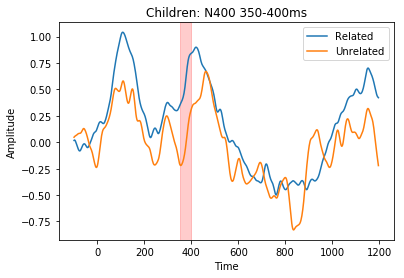

In [22]:
dfErp = pd.read_excel(lsFiles[0])
plt.plot(dfErp.loc[:30,:].mean(), label='Related')
plt.plot(dfErp.loc[31:61,:].mean(), label='Unrelated')
plt.axvspan(350, 400, color='red', alpha=0.2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Children: N400 350-400ms')
#plt.savefig('./Figures/Children_RelatedVsUnrelated_I.png')

In [24]:
tupTime = (350, 400)
arrIndexTime = np.multiply(dfErp.columns > tupTime[0], dfErp.columns < tupTime[1])
stats.ttest_rel(dfErp.loc[:30,arrIndexTime].mean(axis=1), 
                dfErp.loc[31:61,arrIndexTime].mean(axis=1))

Ttest_relResult(statistic=1.842634688470465, pvalue=0.07528499274636552)

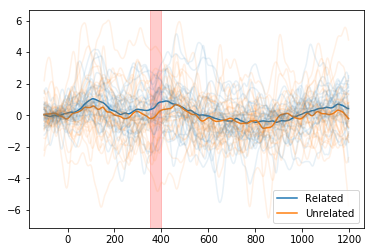

In [10]:
plt.plot(dfErp.loc[:30,:].mean(), label='Related')
plt.plot(dfErp.loc[31:61,:].mean(), label='Unrelated')
plt.legend()
plt.axvspan(350, 400, color='red', alpha=0.2);
for ix in range(30):
    plt.plot(dfErp.loc[ix, :], c='C0', alpha=0.1, label=None)
    plt.plot(dfErp.loc[ix+31, :], c='C1', alpha=0.1, label=None) 
    
#plt.savefig('./Figures/Children_RelatedVsUnrelated_I_variability.png')

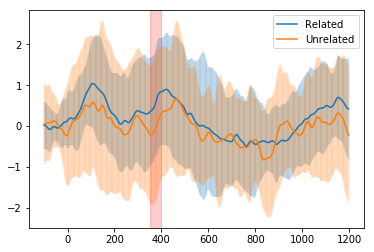

In [5]:
plt.plot(dfErp.loc[:30,:].mean(), label='Related')
plt.plot(dfErp.loc[31:61,:].mean(), label='Unrelated')
plt.legend()
plt.errorbar(dfErp.loc[:30,:].mean().index, dfErp.loc[:30,:].mean(), yerr=dfErp.loc[:30,:].std(), alpha=0.1, color='C0')
plt.errorbar(dfErp.loc[31:61,:].mean().index, dfErp.loc[31:61,:].mean(), yerr=dfErp.loc[31:61,:].std(), alpha=0.1, color='C1')
plt.axvspan(350, 400, color='red', alpha=0.2);
plt.savefig('./Figures/Children_RelatedVsUnrelated_I_variability2.png')

In [6]:
dfRelated = dfErp.loc[:30, :]
dfUnrelated = dfErp.loc[31:61, :]
dfUnrelated.index = dfRelated.index
dfDiff = dfRelated - dfUnrelated

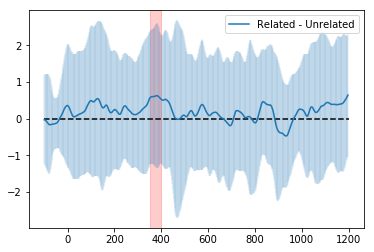

In [7]:
plt.plot(dfDiff.mean(), label='Related - Unrelated')
plt.legend()
plt.errorbar(dfDiff.mean().index, dfDiff.mean(), yerr=dfDiff.std(), alpha=0.1, color='C0')
plt.axvspan(350, 400, color='red', alpha=0.2);
plt.hlines(0, xmin=-100, xmax=1200, linestyles='dashed')

In [19]:
tupTime = (350, 400)
arrTime = np.multiply(dfErp.columns > tupTime[0], dfErp.columns < tupTime[1])
stats.ttest_rel(dfErp.loc[:30,arrTime].mean(axis=1), 
                dfErp.loc[31:61,arrTime].mean(axis=1))

Ttest_relResult(statistic=1.842634688470465, pvalue=0.07528499274636552)

In [9]:
0.07528499274636552/2

0.03764249637318276

In [6]:
def plot_reg_jointplot(strErpPath, strErspPath, tupErpTime, strFreq, strTitle, strSavePlot=''):
    dfErp = pd.read_excel(strErpPath)
    dfErpMeanAmps = pd.DataFrame(index=range(31), columns=['Related', 'Unrelated', 'Unrelated-Related'])    
    arrIndexTime = np.multiply(dfErp.columns > tupErpTime[0], dfErp.columns < tupErpTime[1])
    dfErpMeanAmps = pd.DataFrame(index=range(31), columns=['Related', 'Unrelated', 'Unrelated-Related'])
    dfErpMeanAmps['Related'] = dfErp.loc[:30,arrIndexTime].mean(axis=1)
    dfErpMeanAmps['Unrelated'] = dfErp.loc[31:61,arrIndexTime].mean(axis=1).values
    dfErpMeanAmps['Unrelated-Related'] = dfErpMeanAmps['Unrelated'] - dfErpMeanAmps['Related']
    
    dfErsp = pd.read_csv(strErspPath, header=None)
    dfErsp = dfErsp.T
    dfErsp['Unrelated-Related'] = dfErsp[0] - dfErsp[1]
    
    dfCorr = pd.DataFrame(index=range(31), columns=[strFreq + ' Amplitude Diff', 'N400 Amplitude Diff'])
    dfCorr[strFreq + ' Amplitude Diff'] = dfErsp['Unrelated-Related']
    dfCorr['N400 Amplitude Diff'] = dfErpMeanAmps['Unrelated-Related']
    
    sns.jointplot(x=strFreq + ' Amplitude Diff', y='N400 Amplitude Diff', data=dfCorr, fit_reg=True, kind='reg')
    plt.title(strTitle, y=-0.18)
    if strSavePlot:
        plt.savefig(strSavePlot, bbox_inches='tight')
        
    dfCorr['N400 ({}) Unrelated'.format(tupErpTime)] = dfErpMeanAmps['Unrelated']
    dfCorr['N400 ({}) Related'.format(tupErpTime)] = dfErpMeanAmps['Related']
    dfCorr['Theta ({}) Unrelated'.format(strTitle[-9:])] = dfErsp[0]
    dfCorr['Theta ({}) Related'.format(strTitle[-9:])] = dfErsp[1]
        
    return dfCorr

In [11]:
lsFiles

['/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERP/Children_RelatedVsUnrelated_3-5_30FirFiltI.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Theta_4  8Hz_400  800ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Alpha_9  12Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Alpha_9  12Hz_600  750ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Theta_sig_electrodes_4  8Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/Maguire/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated_3-5.study_Alpha_9  12Hz_150  400ms.csv']

/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

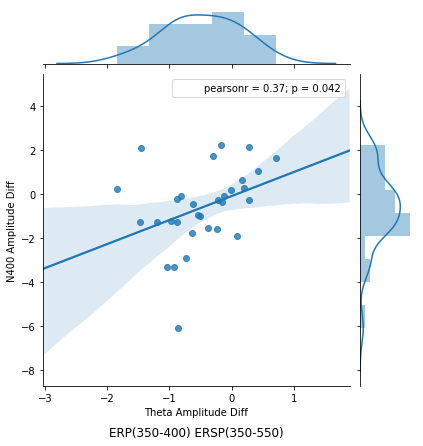

In [12]:
dfCorr = plot_reg_jointplot(lsFiles[0], lsFiles[4], (350, 400), 'Theta', 'ERP(350-400) ERSP(350-550)')#,
                   #'./Figures/Theta_350-550_N400_350-400.png')

In [13]:
dfCorr.head()

,Theta Amplitude Diff,N400 Amplitude Diff,"N400 ((350, 400)) Unrelated","N400 ((350, 400)) Related",Theta ((350-550)) Unrelated,Theta ((350-550)) Related
0,-0.301890,1.728619,1.384049,-0.344570,-0.50534,-0.203450
1,-0.004830,0.204516,-0.167261,-0.371777,0.38977,0.394600
2,0.705310,1.673528,1.409126,-0.264402,0.60044,-0.104870
3,0.425400,1.066598,0.134243,-0.932355,0.32059,-0.104810
4,-0.236346,-1.580112,0.748129,2.328241,-0.17404,0.062306


In [14]:
dfCorr.to_csv('Correlation_N400_350-400_Theta_350-500.csv')

/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

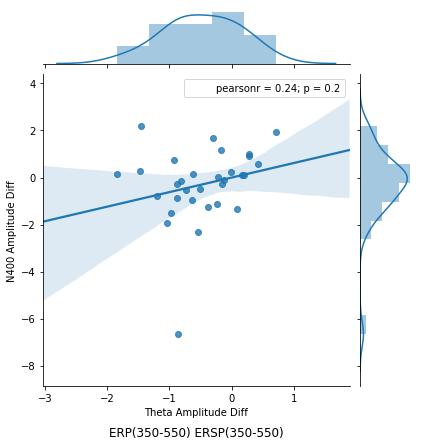

In [15]:
_ = plot_reg_jointplot(lsFiles[0], lsFiles[4], (350, 550), 'Theta', 'ERP(350-550) ERSP(350-550)', '')

/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

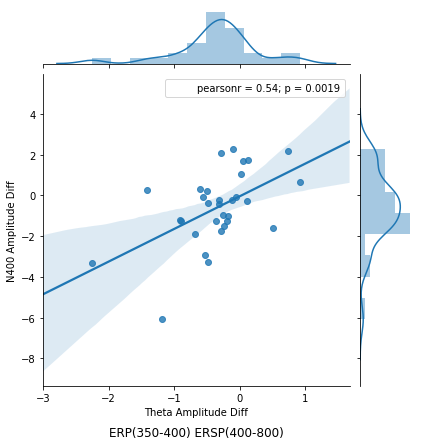

In [18]:
_ = plot_reg_jointplot(lsFiles[0], lsFiles[1], (350, 400), 'Theta', 'ERP(350-400) ERSP(400-800)', '')

# Children Alpha

In [307]:
lsFiles

['/project/bioinformatics/DLLab/Vyom/MTC_Correlation/Children/ERP/Children_RelatedVsUnrelated_3-5_30FirFiltI.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated.study_Theta_4  8Hz_400  800ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated.study_Alpha_9  12Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated.study_Alpha_9  12Hz_150  400ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated.study_Theta_4  8Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation/Children/ERSP/Amps_Children_RelatedVsUnrelated.study_Alpha_9  12Hz_600  750ms.csv']

/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

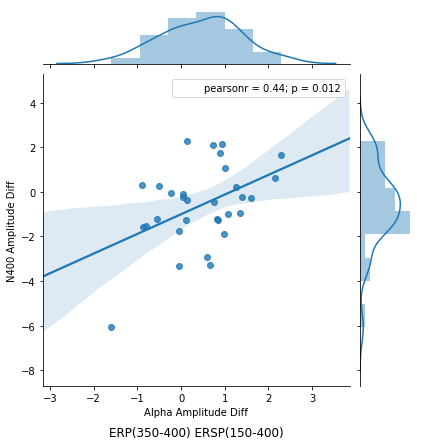

In [20]:
_ =plot_reg_jointplot(lsFiles[0], lsFiles[3], (350, 400), 'Alpha', 'ERP(350-400) ERSP(150-400)', 
                   './Figures/Alpha_150-400_N400_350-400.png')

/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/VyomtfGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

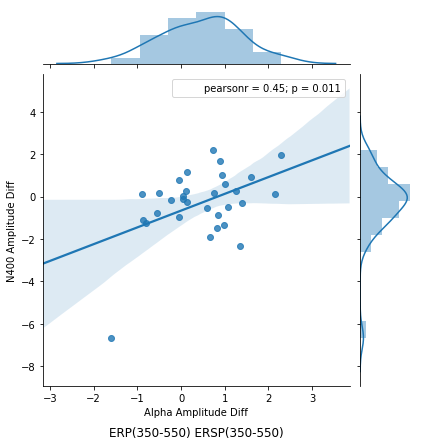

In [21]:
_ = plot_reg_jointplot(lsFiles[0], lsFiles[3], (350, 550), 'Alpha', 'ERP(350-550) ERSP(350-550)', '')

# Adults ERP

In [288]:
lsFiles2 = glob.glob(strPath + '/Adults/ERP/*.xlsx')

In [289]:
lsFiles2

['/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltJ.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltK.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltB.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltM.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltF.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltL.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltC.xlsx']

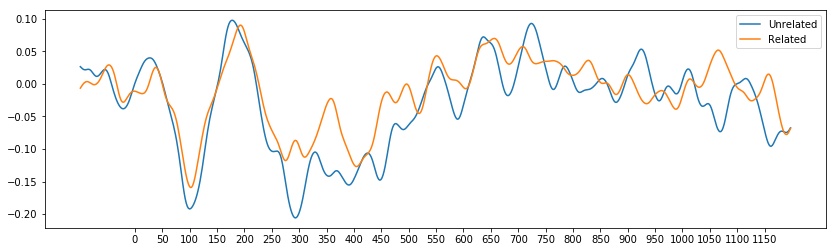

In [281]:
dfErp = pd.read_excel(lsFiles2[3])
f, ax = plt.subplots(figsize=(14, 4))
ax.plot(dfErp.loc[:30,:].mean(), label='Unrelated')
ax.plot(dfErp.loc[31:61,:].mean(), label='Related')
ax.xaxis.set_ticks(np.arange(0, 1200, 50))
ax.legend()

In [284]:
tupTime = (350, 400)
arrTime = np.multiply(dfErp.columns > tupTime[0], dfErp.columns < tupTime[1])
stats.ttest_rel(dfErp.loc[:30,arrTime].mean(axis=1), 
                dfErp.loc[31:61,arrTime].mean(axis=1))

Ttest_relResult(statistic=-1.6145260915250168, pvalue=0.11688374382726771)

# Adults Theta

In [11]:
lsFiles3 = glob.glob(strPath + '/Adults/ERP/*M*.xlsx') + glob.glob(strPath + '/Adults/ERSP/*.csv') 
lsFiles3

['/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltM.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Theta_4  8Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Alpha_9  12Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Alpha_9  12Hz_400  600ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Theta_4  8Hz_300  900ms.csv']

In [ ]:
# Plotting distribution of theta effects

/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


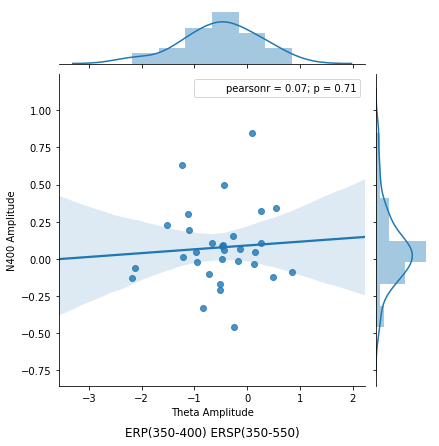

In [297]:
plot_reg_jointplot(lsFiles3[0], lsFiles3[1], (350, 400), 'Theta', 'ERP(350-400) ERSP(350-550)', '')

/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


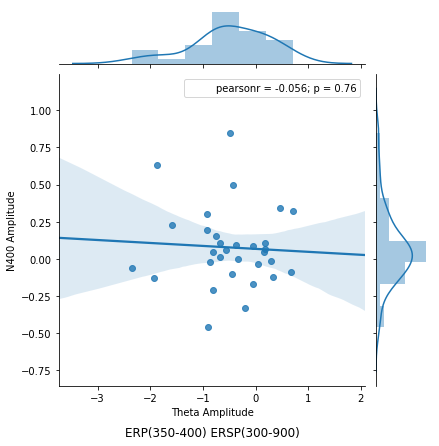

In [298]:
plot_reg_jointplot(lsFiles3[0], lsFiles3[4], (350, 400), 'Theta', 'ERP(350-400) ERSP(300-900)', '')

/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


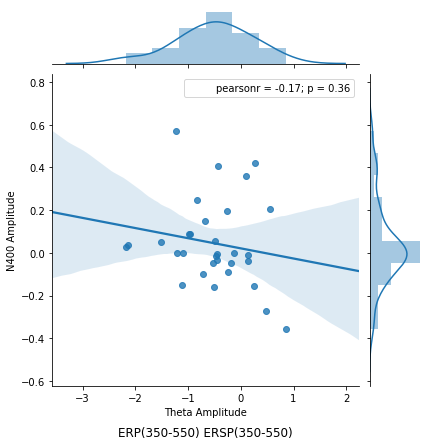

In [299]:
plot_reg_jointplot(lsFiles3[0], lsFiles3[1], (350, 550), 'Theta', 'ERP(350-550) ERSP(350-550)', '')

/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


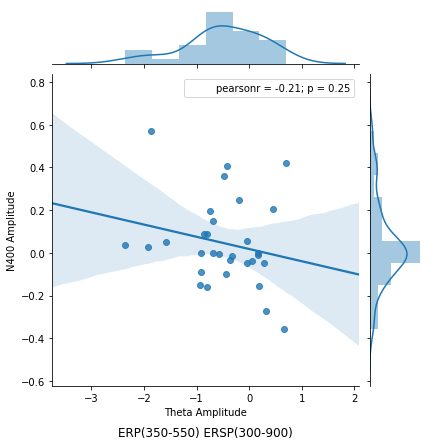

In [302]:
plot_reg_jointplot(lsFiles3[0], lsFiles3[4], (350, 550), 'Theta', 'ERP(350-550) ERSP(300-900)', '')

# Adults Alpha

In [303]:
lsFiles3

['/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERP/Adults_RelatedVsUnrelated_30FirFiltM.xlsx',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Theta_4  8Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Alpha_9  12Hz_350  550ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Alpha_9  12Hz_400  600ms.csv',
 '/project/bioinformatics/DLLab/Vyom/MTC_Correlation//Adults/ERSP/Amps_Adults_RelatedVsUnrelated.study_Theta_4  8Hz_300  900ms.csv']

/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


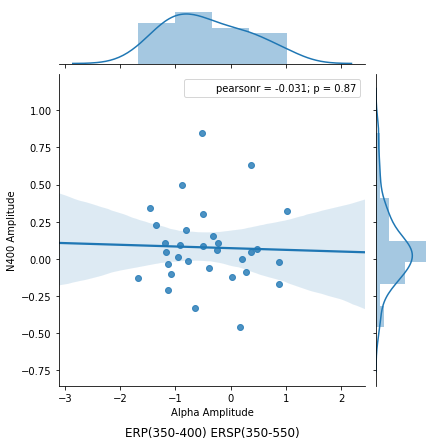

In [304]:
plot_reg_jointplot(lsFiles3[0], lsFiles3[2], (350, 400), 'Alpha', 'ERP(350-400) ERSP(350-550)', '')

/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/project/bioinformatics/DLLab/shared/CondaEnvironments/Vyom3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


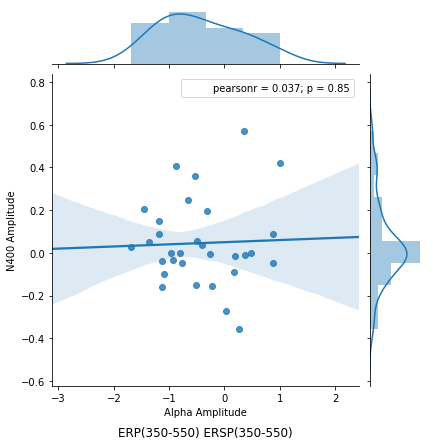

In [306]:
plot_reg_jointplot(lsFiles3[0], lsFiles3[2], (350, 550), 'Alpha', 'ERP(350-550) ERSP(350-550)', '')